In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import random

In [2]:
%pwd

'/opt/ml/code/jdu'

In [3]:
IMG_PATH = "/opt/ml/input/cropped_v2.1/train/images/"
sample_img = "000001_female_Asian_45/incorrect_mask.jpg"

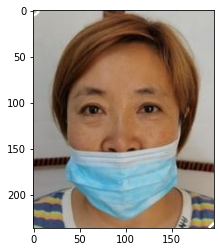

In [4]:
origin = cv2.imread(IMG_PATH + sample_img)
img = origin.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Filp

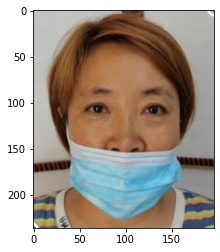

In [5]:
img = origin.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 좌우반전
img = cv2.flip(img, 1)
# 상하반전
# img = cv2.flip(img, -1)
plt.imshow(img)

change angle

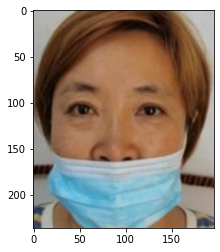

In [8]:
img = origin.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
w, h, c = img.shape

cross_line = int((w*w + h*h)**0.5)
rotate_point = int(w/2), int(h/2)

# rotate_angle = 30
rotate_angle = np.random.randint(-30, 30)

rotate_option = cv2.getRotationMatrix2D(rotate_point, rotate_angle, 1.2)
img = cv2.warpAffine(img, rotate_option, (h,w))

plt.imshow(img)

Averaging(필터 박스내의 평균을 이용하는 방법)

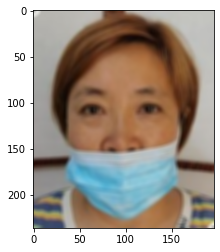

In [9]:
img = origin.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 필터가 작을수록 선명하다
img = cv2.blur(img, (5,5))
plt.imshow(img)

Gaussian Blur

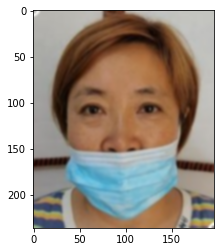

In [40]:
img = origin.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 필터가 작을수록 선명하다
img = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(img)

fill

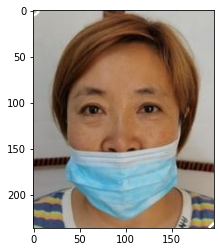

In [46]:
img = origin.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
plt.imshow(img)

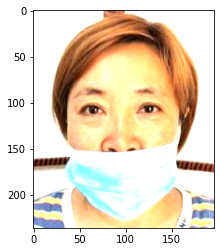

In [56]:
def contrast(gray, min_val, max_val):
    alpha = int(random.uniform(min_val, max_val)) # Contrast control
    adjusted = cv2.convertScaleAbs(gray, alpha=alpha)
    return adjusted

img = origin.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = contrast(img, 1, 3)
plt.imshow(img)

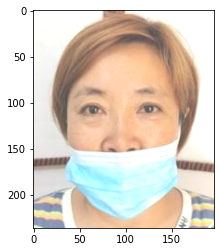

In [63]:
def brightness(gray, val):
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    brightness = int(random.uniform(-val, val))
    if brightness > 0:
        gray = gray + brightness
    else:
        gray = gray - brightness
    gray = np.clip(gray, 10, 255)
    return gray

img = origin.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = brightness(img, 100)
plt.imshow(img)

Pillow

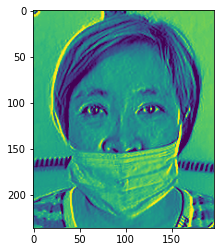

In [43]:
from PIL import Image
from PIL import ImageFilter

img = Image.open(IMG_PATH + sample_img)
img = img.convert("L")
img = img.filter(ImageFilter.Kernel((3,3), [1, 0, -1, 5, 0, -5, 1, 0, 1]))

# img.save("output_path")

plt.imshow(img)